**Цель проекта - исследовать данные и подготовить к дальнейшему моделированию.**

**Задача - создать модель, которая может предсказывать оценку ученика;** 
          **или, другими словами, отобрать параметры, которые могут влить на оценку ученика.**

### Этап 1.
**Первичная обработка и заполнение пропусков**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок
stud_math = pd.read_csv('stud_math.csv')

In [2]:
display(stud_math.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [3]:
# Переименовали колонку с запятой
stud_math.rename(
    columns={'studytime, granular': 'studytime_granular'}, inplace=True)

In [4]:
# Видим: количество строк 395; 13 колонок числовых данных; 17 колонок категоиальных данных.
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                395 non-null object
sex                   395 non-null object
age                   395 non-null int64
address               378 non-null object
famsize               368 non-null object
Pstatus               350 non-null object
Medu                  392 non-null float64
Fedu                  371 non-null float64
Mjob                  376 non-null object
Fjob                  359 non-null object
reason                378 non-null object
guardian              364 non-null object
traveltime            367 non-null float64
studytime             388 non-null float64
failures              373 non-null float64
schoolsup             386 non-null object
famsup                356 non-null object
paid                  355 non-null object
activities            381 non-null object
nursery               379 non-null object
studytime_granular    388 non-null float64
higher  

In [5]:
# Посчитали количество и процент пропусков в колонках
for col in stud_math.columns:
    nbr_missing = stud_math[col].isnull().sum()
    pct_missing = np.mean(stud_math[col].isnull())
    print('{} - {} ; {}%'.format(col, nbr_missing, round(pct_missing*100)))

school - 0 ; 0.0%
sex - 0 ; 0.0%
age - 0 ; 0.0%
address - 17 ; 4.0%
famsize - 27 ; 7.0%
Pstatus - 45 ; 11.0%
Medu - 3 ; 1.0%
Fedu - 24 ; 6.0%
Mjob - 19 ; 5.0%
Fjob - 36 ; 9.0%
reason - 17 ; 4.0%
guardian - 31 ; 8.0%
traveltime - 28 ; 7.0%
studytime - 7 ; 2.0%
failures - 22 ; 6.0%
schoolsup - 9 ; 2.0%
famsup - 39 ; 10.0%
paid - 40 ; 10.0%
activities - 14 ; 4.0%
nursery - 16 ; 4.0%
studytime_granular - 7 ; 2.0%
higher - 20 ; 5.0%
internet - 34 ; 9.0%
romantic - 31 ; 8.0%
famrel - 27 ; 7.0%
freetime - 11 ; 3.0%
goout - 8 ; 2.0%
health - 15 ; 4.0%
absences - 12 ; 3.0%
score - 6 ; 2.0%


In [6]:
# Еще немного анализа
print(
    f'Датасет содержит {stud_math.isnull().any().sum()} колонок с пустыми значениями.')

Датасет содержит 27 колонок с пустыми значениями.


In [7]:
# Исследуем объектные данные
stud_math.describe(include=['object'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


In [8]:
# Исследуем числовые данные
stud_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Пропуски в категориальных колонках заполним самым частым значением

In [9]:
for col in stud_math:
    if stud_math[col].dtype == 'object':
        stud_math.Pstatus.fillna(stud_math[col].mode()[0], inplace=True)

Пропуски в колонках 'score', 'absences' заполним медианным значением

In [10]:
stud_math.score.fillna(stud_math.score.mode()[0], inplace=True)
stud_math.absences.fillna(stud_math.absences.mode()[0], inplace=True)

Оставшиеся пропуски заполним также самым частым значением

In [11]:
for col in stud_math:
    stud_math[col].fillna(stud_math[col].mode()[0], inplace=True)

### Этап 2.
**Изучаем распределение числовых признаков. Устраняем выбросы**

Ищем выбросы в главной колонке "score".

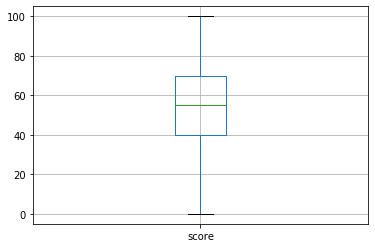

In [12]:
stud_math.boxplot(column=['score'])

In [13]:
IQR = stud_math.score.quantile(0.75) - stud_math.score.quantile(0.25)
perc25 = stud_math.score.quantile(0.25)
perc75 = stud_math.score.quantile(0.75)
print("Границы выбросов absences: [{f}, {l}].".format(
    f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

Границы выбросов absences: [-5.0, 115.0].


нет выбросов в колонке "score";
максимальные и минимальные значения - в пределах границ выбросов.

In [14]:
Посчитаем количество значений в остальных числовых колонках.

SyntaxError: invalid syntax (<ipython-input-14-7ce46d7d66de>, line 1)

In [ ]:
# Числовые колонки
for col in stud_math:
    if stud_math[col].dtype != 'object':
        display(stud_math[col].value_counts())

Подсчитываем количество разных значений в колонках:
age - значения лежат в пределах исследования;
Medu - в пределах исследования; Делаю допущение, что признак можно считать категорийным. Так как содержит ограниченный набор значений.
Fedu - есть выброс; Также признак можно считать категорийным.

In [ ]:
stud_math['Fedu'].value_counts()

In [ ]:
# удаляем выброс Fedu
stud_math = stud_math.loc[stud_math.Fedu <= 4.0]

Далее
Подсчитываем количество разных значений:
traveltime - в пределах исследования; Также признак можно считать категорийным.
studytime - в пределах исследования; Также признак можно считать категорийным.
failures - в пределах исследования; Также признак можно считать категорийным.
studytime_granular - столбец не описан во вводной части, но оставлю его. Можно считать категорийным.
famrel - есть выброс; Также признак можно считать категорийным.

In [ ]:
stud_math['famrel'].value_counts()

In [ ]:
# удаляем выброс famrel
stud_math = stud_math.loc[stud_math.famrel >= 1.0]

Далее
Подсчитываем количество разных значений:
freetime - в пределах исследования; Также признак можно считать категорийным.
goout - в пределах исследования; Также признак можно считать категорийным.
health - в пределах исследования; Также признак можно считать категорийным.
absences - есть выброс; 

In [ ]:
stud_math.boxplot(column=['absences'])

In [ ]:
IQR = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)
print("Границы выбросов absences: [{f}, {l}].".format(
    f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

In [ ]:
# удаляем выброс absences
stud_math = stud_math.loc[stud_math.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [ ]:
Посчитаем количество значений в категорийных колонках.

In [ ]:
# категорийные колонки
for col in stud_math:
    if stud_math[col].dtype == 'object':
        display(stud_math[col].value_counts())

В категорийных колонках странностей не обнаружено. Значения соответствуют описанию.

### Этап 3.
**Корреляционный анализ**

In [ ]:
stud_math.corr()

Колонок с высокой корреляцией не видно.

### Этап 4.
**Анализ номинативных переменных**

In [ ]:
for col in stud_math:
    if stud_math[col].dtype == 'object':
        fig, ax = plt.subplots(figsize=(6, 4))
        sns.boxplot(x=col, y='score',
                    data=stud_math.loc[stud_math.loc[:, col].isin(
                        stud_math.loc[:, col].value_counts().index[:20])],
                    ax=ax)
        plt.xticks(rotation=45)
        ax.set_title('Boxplot for ' + col)
        plt.show()

In [ ]:
Делаю допущение, что все параметры влияют на оценку

Сделаем тест Стьюдента.

In [ ]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:20]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

In [ ]:
Проследим, как влияют конкретные значения признаков, отобранным тестом.

In [ ]:
Разделю датасет на две группы. С оценкой < 60 и >= 60 .
Это прообраз группы риска (ученики с низкой оценкой).

In [ ]:
# Количество записей
stud_math[stud_math.score < 60.0].shape[0]

In [ ]:
# Количество записей
stud_math[stud_math.score >= 60.0].shape[0]

In [ ]:
stud_math[stud_math.score < 60.0].groupby(
    ['sex'])['score'].count().sort_values().head(10)

In [ ]:
stud_math[stud_math.score >= 60.0].groupby(
    ['sex'])['score'].count().sort_values().head(10)

In [ ]:
'sex' - Женщин в гуппе риска больше. Влияние слабое.

In [ ]:
stud_math[stud_math.score < 60.0].groupby(
    ['address'])['score'].count().sort_values().head(10)

In [ ]:
stud_math[stud_math.score >= 60.0].groupby(
    ['address'])['score'].count().sort_values().head(10)

In [ ]:
'address' - Живущих за городом в группе риска в два раза больше.

In [ ]:
stud_math[stud_math.score < 60.0].groupby(
    ['Mjob'])['score'].count().sort_values().head(10)

In [ ]:
stud_math[stud_math.score >= 60.0].groupby(
    ['Mjob'])['score'].count().sort_values().head(10)

'Mjob' - Уберу столбец. Не вижу преобладающего влияния какого либо значения.

In [ ]:
stud_math.drop(['Mjob'], axis='columns', inplace=True)

In [ ]:
stud_math[stud_math.score < 60.0].groupby(
    ['paid'])['score'].count().sort_values().head(10)

In [ ]:
stud_math[stud_math.score >= 60.0].groupby(
    ['paid'])['score'].count().sort_values().head(10)

'paid' - Отсутствие доп. занятий влияет на попадание в группу риска. Влияние слабое.

In [ ]:
stud_math[stud_math.score < 60.0].groupby(
    ['romantic'])['score'].count().sort_values().head(10)

In [ ]:
stud_math[stud_math.score >= 60.0].groupby(
    ['romantic'])['score'].count().sort_values().head(10)

'romantic' - Уберу колонку. Не вижу преобладающего влияния какого либо значения.

In [ ]:
stud_math.drop(['romantic'], axis='columns', inplace=True)

Проведу такой же анализ для остальных категорийных и псевдокатегорийных колонок.

In [ ]:
for col in stud_math:
    if col not in ['score', 'address', 'sex', 'Mjob', 'paid', 'higher', 'romantic', 'absences']:
        print(stud_math[stud_math.score < 60.0].groupby(
            [col])['score'].count().sort_values().head(7))
        print(stud_math[stud_math.score >= 60.0].groupby(
            [col])['score'].count().sort_values().head(7))

In [ ]:
'school' - распределение пропорциональное. Убрать колонку.
'age' - С 16 до 18 лет - в гуппе риска.
'famsize'- распределение пропорциональное. Убрать колонку.
'Pstatus'- распределение пропорциональное. Убрать колонку.
'Fedu' и 'Medu' - низкое образование - в группе риска.
'Fjob'- Признак с высоким значением "прочее", не информативен. Убрать колонку.
'reason'- course и home - в гуппе риска.
'guardian'- распределение пропорциональное. Убрать колонку.
'traveltime'- Чем дальше от школы, тем больше вероятность попадания в гуппу риска. Влияние высокое.
'studytime'- Чем меньше времени на учебу, тем больше вероятность попадания в гуппу риска. Влияние высокое.
'failures'- большое количество неудач - в гуппе риска.
'schoolsup'-  доп. поддержка - в гуппе риска.
'famsup'- распределение пропорциональное. Убрать колонку.
'activities'- распределение пропорциональное. Убрать колонку.
'nursery'- распределение пропорциональное. Убрать колонку.
'studytime_granular'- -6 - в гуппе риска.
'internet'- распределение пропорциональное. Убрать колонку.
'famrel'- распределение пропорциональное. Убрать колонку.
'freetime'- Большое свободное время- в гуппе риска.
'goout'- Большое свободного времени с друзьями - в гуппе риска. 
'health'- Хорошее здоровье - в гуппе риска. 

In [ ]:
stud_math.drop(['school', 'famsize', 'Pstatus', 'Fjob', 'guardian', 'famsup', 'activities',
                'nursery', 'internet', 'famrel', 'health'], axis='columns', inplace=True)

Анализируем колонку 'absences' :

In [ ]:
stud_math[stud_math.score >= 60.0]['absences'].sum()

In [ ]:
stud_math[stud_math.score < 60.0]['absences'].sum()

In [ ]:
'absences'- Большие пропуски занятий - в гуппе риска. Влияние высокое.

Остались колонки:

In [ ]:
stud_math.columns

### Выводы.

В результате EDA для анализа влияния условий жизни учащегося на успеваемость по математике были получены следующие выводы:

1.В данных присутствует мало пустых значений.
2.Выбросы найдены только в столбцах famrel и abcences, что позволяет сделать вывод о том, что данные достаточно чистые.
3.Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это - 'sex', 'age', 'address',  'Medu', 'Fedu', 'reason', 'traveltime','studytime', 'failures', 'schoolsup', 'paid', 'studytime_granular',
'higher', 'freetime', 'goout', 'absences', 'score'.

### Саморефлексия
1. Работой не довольна. Слабая.
2. Не совсем поняла применение графиков. Надо помедитировать
3. Очень интересная тема. Планирую перечитать материал и посмотреть доп. материалы.
4. Спасибо, что подождали.